In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

Granica decyzyjna wyznaczona przez SVM oraz margines klasyfikacji.

In [2]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

In [3]:
from sklearn.datasets import make_blobs

centers = [(4, 0), (0, 4)]
X, y = make_blobs(n_samples=20, centers=centers, shuffle=False, random_state=42)

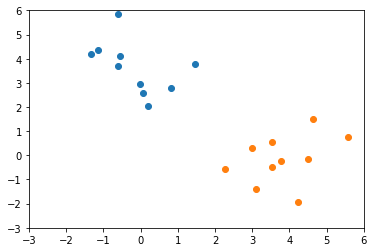

In [4]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "o")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "o")
plt.xlim([-3, 6])
plt.ylim([-3, 6])
plt.show()


In [5]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=100, random_state=0)
svm_clf.fit(X, y)

SVC(C=100, kernel='linear', random_state=0)

In [6]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    x_current=1
#     plt.arrow(x_current, w*x_current-b, 1, 1, head_width=0.1, head_length=0.1, ec="red", color="red", length_includes_head=True)
    plt.arrow(x_current, -w[0]/w[1] * x_current - b/w[1], w[0], w[1], head_width=0.1, head_length=0.1, ec="black", color="black", length_includes_head=True)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='gray')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    print(b)
    print(w)

0.29474639117750123
[-0.47493159  0.3943154 ]


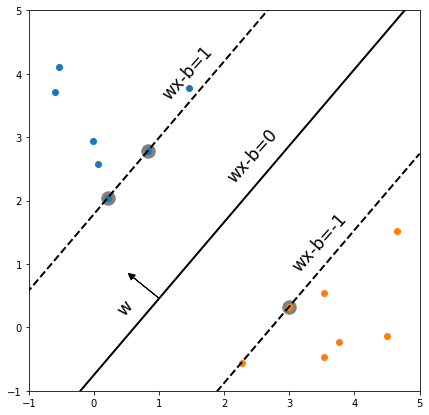

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "o")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "o")
plot_svc_decision_boundary(svm_clf, -5, 5)
plt.text(2, 2.3, r"wx-b=0", fontsize=17,rotation=48)
plt.text(1., 3.6, r"wx-b=1", fontsize=17,rotation=48)
plt.text(3, 0.9, r"wx-b=-1", fontsize=17,rotation=48)
plt.text(0.3, 0.2, r"w", fontsize=17,rotation=48)
plt.xlim([-1, 5])
plt.ylim([-1, 5])
# plt.axis("equal")
plt.show()